<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosFerramentasDeInteligenciaArtificial/blob/main/Relatorio1_CarolineSouzaCamargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 1 -  Caroline Souza Camargo

# Observações

Para elaboração deste relatório foram implementados os 4 métodos vistos em aula e uma função para elaboração dos gráficos. A seguir os respectivos protótipos:

*   def exibirGrafico(f, a, b, pontos_x = None, titulo = "Gráfico")
*   def bissecção(f, a, b, precisao, n = 500, exibirTabela = True)
*   def falsaPosição(f, a, b, precisao, n = 500, exibirTabela = True)
*   def newtonRaphson(f, a, b, precisao, n = 500, exibirTabela = True)
*   def metodoSecante(f, a, b, precisao, n = 500, exibirTabela = True)

Observe que alguns atributos são opcionais a serem passados por parâmetros quando a função é chamada, como o título do gráfico, uma lista de pontos a serem marcados nesse gráfico e o número máximo de interações que o algoritmo pode possuir. Esse limite foi definido como 500 para evitar loop infinito caso aconteça, mas pode ser alterado.

Vale ressaltar que os métodos foram implementados conforme o pseudocódigo fornecido em aula. Além do resultado final, esses métodos também fornecem o passo a passo da execução do algoritmo, facilitando a compreensão e visualização dos resultados obtidos. No entanto, a exibição na tela do resultado de cada iteração é opcional e pode ser modificada configurando o atributo exibirTabela como False.

Em relação a questões de arredondamento e precisão não foi utilizado nenhuma técnica explicitamente, apenas o que é implementado por padrão em python. Assim, pode haver perda de precisão devido à representação binária desses números de ponto flutuante


# Métodos

In [ ]:
# Bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, cos, sin, log
from tabulate import tabulate

In [ ]:
# Contruindo gráfico da função
def exibirGrafico(f, a, b, pontos_x = None, titulo = "Gráfico"):
  x = np.linspace(a , b, 1000)

  plt.figure(figsize=(7, 5))  # Tamanho da figura

  plt.axhline(0, color='black', linestyle='--', linewidth=1) # Eixo x
  plt.axvline(0, color='black', linestyle='--', linewidth=1) # Eixo y

  y = [] # Gerando valores de f(x)
  for num in x:
      y.append(f(num))

  plt.plot(x, y, label="Função", color='#5b1d99', markersize = 1.5, marker = '.')  # Linha da função
  plt.title(titulo)
  plt.xlabel("f(x)")
  plt.ylabel("x")
  plt.legend()

  if pontos_x is not None:
    pontos_y = []  # Encontrando valores de f(x) corresponde a cada x
    for x in pontos_x:
      pontos_y.append(f(x))

    plt.scatter(pontos_x, pontos_y, color='#ff1168', label="Pontos", s=70)
    plt.scatter(pontos_x[-1], pontos_y[-1], color='black', label="Pontos", s=70)

  plt.grid(True)
  plt.show()

In [ ]:
def bissecção(f, a, b, precisao, n = 500, exibirTabela = True):
  if (f(a) * f(b) >= 0):
    print("Não ocorreu a mudança de sinal no intervalo especificado\n\n")
    return False

  if abs(b - a) < precisao:
    return a

  if exibirTabela:
    print("\n\nAlgoritmo do Método da Bissecção")
    print(f'a = {a} \nb = {b} \nPrecisão = {precisao} \nNúmero Máximo de Interações = {n} \n')
  cabeçalhoTabela = ["n", "a", "b", "x", "f(x)", "f(a)", "f(a)*f(x)"]

  list = []
  dadosTabela = []
  for k in range(1, n + 1):
    x = (a + b) / 2
    fA = f(a)
    fB = f(b)
    fX = f(x)

    list.append(x)
    dadosTabela.append((k, a, b, x, fX, fA, fA*fX))

    # Verificando a troca de sinal
    if (fA * fX) < 0:
      b = x
    else:
      a = x

    # Critério de Parada
    if abs(b - a) < precisao:
      if exibirTabela:
        tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
        print(tabela_formatada)
        print(f'\nResultado: {x}\n')
      return list


  if exibirTabela:
    tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
    print(tabela_formatada)
    print(f'\nResultado: {x}\n')
  return list

In [ ]:
def falsaPosição(f, a, b, precisao, n = 500, exibirTabela = True):
  if (f(a) * f(b)) >= 0:
    return False

  if abs(b - a) < precisao:
    return a

  if exibirTabela:
    print("\n\nAlgoritmo do Método da Falsa Posição")
    print(f'a = {a} \nb = {b} \nPrecisão = {precisao} \nNúmero Máximo de Interações = {n} \n')
  cabeçalhoTabela = ["n", "a", "b", "x", "f(x)", "f(a)", "f(a)*f(x)"]

  list = []
  dadosTabela = []
  for k in range(1, n + 1):
    fA = f(a)
    fB = f(b)
    x = ((a * fB) - (b * fA)) / (fB - fA)
    fX = f(x)

    list.append(x)
    dadosTabela.append((k, a, b, x, fX, fA, fA*fX))

    # Verificando a troca de sinal
    if (fA * fX) < 0:
      b = x
    else:
      a = x

    # Critério de Parada
    if abs(b - a) < precisao:
      if exibirTabela:
        tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
        print(tabela_formatada)
        print(f'\nResultado: {x}\n')
      return list

  if exibirTabela:
    tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
    print(tabela_formatada)
    print(f'\nResultado: {x}\n')
  return list

In [ ]:
def newtonRaphson(f, x0, precisao, n = 500,  exibirTabela = True):
  list = []
  list.append(x0)

  if abs(f(x0)) < precisao:
    print("\n\nAlgoritmo do Método de Newton Raphson")
    print(f'\nResultado: {x0}\n')
    return list

  #Criando função lambda para a primeira derivada
  X = symbols('x')
  def fD(num):
    return float(diff(f(X), X).subs(X,num))

  if exibirTabela:
    print(f'x0 = {x0} \nPrecisão = {precisao} \nNúmero Máximo de Interações = {n} \n')
  cabeçalhoTabela = ["k", "x", "f(x)", "f'(x)", "x - (f(x)/f'(x))"]

  list = []
  dadosTabela = []
  for k in range(1, n + 1):
    fx0 = f(x0)
    fD0 = fD(x0)
    x1 = x0 - (fx0 / fD0)

    list.append(x0)
    dadosTabela.append((k, x0, fx0, fD0, x1))

    # Critério de Parada
    if abs(f(x1)) < precisao or abs(x1 - x0) < precisao:
      list.append(x1)
      if exibirTabela:
        tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
        print(tabela_formatada)
        print(f'\nResultado: {x1}\n')
      return list

    x0 = x1

  if exibirTabela:
    tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
    print(tabela_formatada)
    print(f'\nResultado: {x1}\n')
  return list

In [ ]:
def metodoSecante(f, x0, x1, precisao, n = 500, exibirTabela = True):
  list = []

  if abs(f(x0)) < precisao:
    list.append(x0)
    print("\n\nAlgoritmo do Método da Secante")
    print(f'\nResultado: {x0}\n')
    return list

  if abs(f(x1)) < precisao or abs(x1 - x0) < precisao:
    list.append(x1)
    print("\n\nAlgoritmo do Método da Secante")
    print(f'\nResultado: {x1}\n')
    return list

  if exibirTabela:
    print("\n\nAlgoritmo do Método da Secante")
    print(f'x0 = {x0} \nx1 = {x1} \nPrecisão = {precisao} \nNúmero Máximo de Interações = {n} \n')
  cabeçalhoTabela = ["k", "x0", "x1", "x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)"]

  list = []
  dadosTabela = []
  for k in range(1, n + 1):
    fx0 = f(x0)
    fx1 = f(x1)
    x2 = x1 - (fx1 / (fx1 - fx0)) * (x1 - x0)
    fx2 = f(x2)

    list.append(x2)
    dadosTabela.append((k, x0, x1, x2))

    # Critério de Parada
    if abs(fx2) < precisao or abs(x2 - x1) < precisao:
      if exibirTabela:
        tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
        print(tabela_formatada)
        print(f'\nResultado: {x2}\n')
      return list

    x0 = x1
    x1 = x2

  if exibirTabela:
    tabela_formatada = tabulate(dadosTabela, headers=cabeçalhoTabela)
    print(tabela_formatada)
    print(f'\nResultado: {x2}\n')
  return list

# Questões



## QUESTÃO 1

**A população de uma determinada bactéria segue a forma da seguinte função:**
\begin{equation}
P(t) = \begin{cases}
    e^t & \text{se } 0 \leq t < 3 \\
    \frac{a \cdot t + 3}{t + 5} & \text{se } t \geq 3
\end{cases}
\end{equation}


**Use o Método da Bissecção para encontrar o valor de a.
Observação: Comece traçando um gráfico para encontrar um intervalo apropriado para a raiz. Utilize tol = 0,0001**

###Resposta

O primeiro passo para resolver o exercício foi encontrar o valor de 't', considerando que a função deve ser contínua. Isso se deve ao fato de que, no contexto do Método da Bissecção, a continuidade é um dos requisitos para a aplicação do algoritmo, uma vez que o método depende da existência de um intervalo no qual a função muda de sinal.

Para isso, o valor de t escolhido foi 3, pois é onde ocorre a mudança de comportamento na função. Uma vez que essa função é composta por duas expressões diferentes, uma para 0 ≤ t < 3 e outra para t ≥ 3 (a mudança de comportamento ocorre precisamente em t = 3)

O próximo passo foi reorganizar a equação substituindo o valor de 't' e expressando em termos de 'a'. Isso é necessário porque 'a' representa a incógnita da função. Vale ressaltar que o procedimento de igualar as duas funções e estabelecer igualdade a zero é necessário, pois o Método da Bissecção visa encontrar as raízes de uma equação contínua. Dessa forma, o passo a passo e a expressão resultante após a simplificação ficaram da seguinte forma:

```
e^t = (a * t + 3) / (t + 5)
e^3 = (3a + 3) / (3 + 5)
8e^3 = 3a + 3
8e^3 - 3a -3 = 0
```

A fim de proporcionar uma visualização adequada e encontrar o intervalo no qual ocorre a interseção da função no eixo x, foi realizada a plotagem do gráfico por meio de funções lambda, conforme pode ser visualizado abaixo:

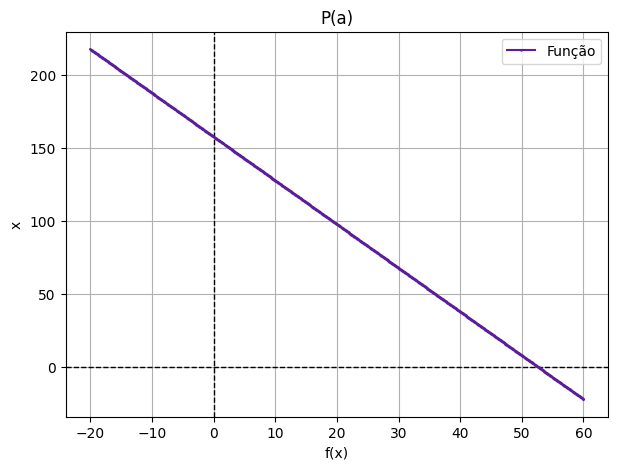

In [ ]:
# Dados provenientes da questão
precisao = 0.0001

# Funções lambda
Pa = lambda a: 8 * (math.e**3) - 3*a -3

exibirGrafico(Pa, -20, 60, None, "P(a)")

Observando o gráfico, podemos notar que ocorre a troca de sinal e a função é contínua. Assim, é possível observar que o intervalo no qual existe a raiz é entre [50, 60].

Logo, o próximo passo foi aplicar o Método da Bissecção para encontrar o valor de 'a' nesse intervalo. Como pode ser visualizado abaixo:

In [ ]:
pontosX = bissecção(Pa, 50, 60, precisao)



Algoritmo do Método da Bissecção
a = 50 
b = 60 
Precisão = 0.0001 
Número Máximo de Interações = 500 

  n        a        b        x          f(x)         f(a)      f(a)*f(x)
---  -------  -------  -------  ------------  -----------  -------------
  1  50       60       55       -7.3157       7.6843       -56.216
  2  50       55       52.5      0.184295     7.6843         1.41618
  3  52.5     55       53.75    -3.5657       0.184295      -0.657143
  4  52.5     53.75    53.125   -1.6907       0.184295      -0.311589
  5  52.5     53.125   52.8125  -0.753205     0.184295      -0.138812
  6  52.5     52.8125  52.6562  -0.284455     0.184295      -0.0524237
  7  52.5     52.6562  52.5781  -0.0500796    0.184295      -0.00922944
  8  52.5     52.5781  52.5391   0.0671079    0.184295       0.0123677
  9  52.5391  52.5781  52.5586   0.00851414   0.0671079      0.000571366
 10  52.5586  52.5781  52.5684  -0.0207827    0.00851414    -0.000176947
 11  52.5586  52.5684  52.5635  -0.0061343

Observa-se, então, que ao aplicar o método da bisseção, o valor encontrado foi 52.5614 e foi necessário 17 interações do método para chegar no resultado para a precisão desejada.

Assim, para assegurar a eficácia do método da Bisseção, é crucial garantir a continuidade da função no intervalo considerado, bem como a presença de uma mudança de sinal nos extremos desse intervalo. A ausência dessas condições pode comprometer a aplicação bem-sucedida do método.

## QUESTÃO 2

**Aplique o Método de Newton-Raphson para calcular a raiz da função abaixo com tol = 0,001.**
\begin{equation}
f(x) = x^3 - 100 \cos(x)
\end{equation}

**a) considere x0 = 1**

**b) considere x0 = -1**

**O que acontece quando os valores de estimativa inicial são alterados? Justifique sua resposta.**

###Resposta

Inicialmente comecei o exercício aplicando o método de Newton-Raphson e gerando o gráfico dos resultados para posteriormente realizar a análise. Observe que os pontos em cor rosa são referentes a pontos de cada execução do algoritmo, enquanto que o ponto preto é o resultado final da aplicação do método.

x0 = 1.0 
Precisão = 0.001 
Número Máximo de Interações = 500 

  k        x         f(x)     f'(x)    x - (f(x)/f'(x))
---  -------  -----------  --------  ------------------
  1  1        -53.0302      87.1471             1.60851
  2  1.60851    7.93261    107.691              1.53485
  3  1.53485    0.0222126  107.003              1.53465

Resultado: 1.53464545779417



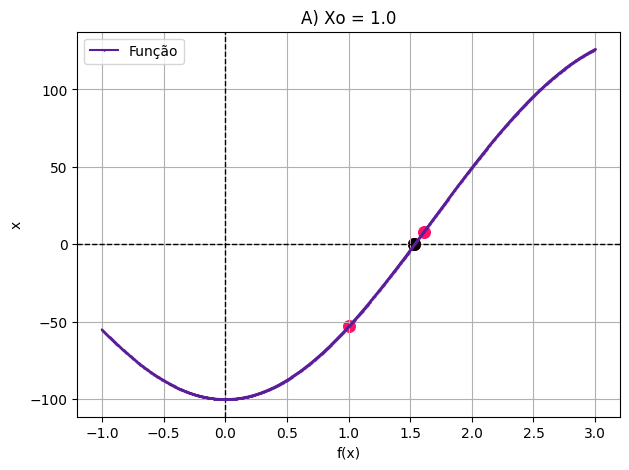

x0 = -1.0 
Precisão = 0.001 
Número Máximo de Interações = 500 

  k         x         f(x)     f'(x)    x - (f(x)/f'(x))
---  --------  -----------  --------  ------------------
  1  -1        -55.0302     -81.1471            -1.67815
  2  -1.67815    5.98914    -90.9757            -1.61232
  3  -1.61232   -0.0400175  -92.1151            -1.61276

Resultado: -1.61275612704296



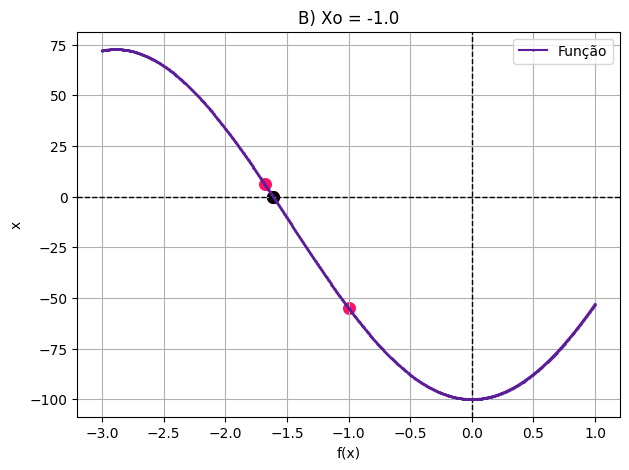

In [ ]:
# Dados provenientes da questão
x0 = 1.0
precisao = 0.001

# Função lambda do problema
Fx = lambda x: x**3 - 100 * cos(x)

# Questão A
pontosX = newtonRaphson(Fx, x0, precisao)
exibirGrafico(Fx, x0 - 2, x0 + 2, pontosX, "A) Xo = 1.0")

# Questão B
x0 = -1.0
pontosX = newtonRaphson(Fx, x0, precisao)
exibirGrafico(Fx, x0 - 2, x0 + 2, pontosX, "B) Xo = -1.0")

Analizando a saida do algorítmo percebe-se que o número de interações permaneceu igual (3 interações), apesar dos valores das estimativas iniciais serem diferentes.
No entanto, nota-se que os resultados encontrados pelo método diferem-se entre si, sendo que para o X0 = 1 foi encontrado a raiz 1.534 e para X0 = -1 foi encontrado -1.612 (Resultados bastante diferentes).
A suposição era que ou implementei o método errado ou que a função tinha mais de uma raiz, para isso plotei o gráfico da função em um intervalo maior:


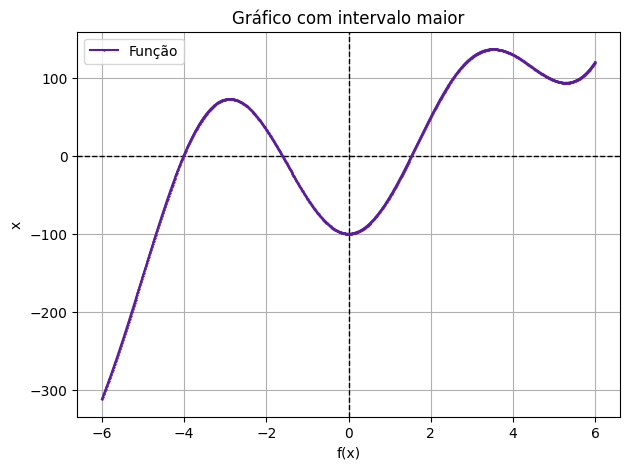

In [ ]:
exibirGrafico(Fx, -6, 6, None, 'Gráfico com intervalo maior')

A segunda hipótese se confirmou: a função tinha mais de uma raiz.

Assim, podemos perceber que para esse exemplo o método de Newton-Raphson converge para a raiz onde a estimativa inicial está mais próxima

## QUESTÃO 3

**Você está projetando um tanque esférico (Figura abaixo) para armazenar água para uma pequena cidade num país em desenvolvimento.**

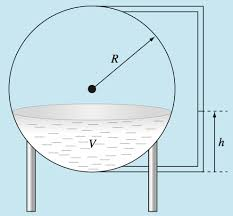

**O volume de líquido que ele pode armazenar pode ser calculado por:**

\begin{equation}
V = \pi \cdot h^2 \cdot \frac{3R - h}{3}
\end{equation}

**Onde V é o volume ($m^3$), h é a profundidade de água no tanque ($m$) e R é o raio do tanque ($m$).**

**Se $R = 3m$, até qual profundidade o tanque deve ser enchido para conter $30 m^3$? Use três iterações do Método da Falsa Posição para obter a resposta. Determine o erro relativo aproximado após cada iteração**




###Resposta

O exercício nos informou que o raio do tanque (R) é 3m e volume desejado de $30m^3$. Logo, o primeiro passo para resolução do exercício foi substiuir esse valores na função e deixar o lado esquerdo igual a zero. Já que o método da falsa posição é utilizado para encontrar raízes de uma função. Ficando da seguinte forma:

```
V = π * (h^2) * (3R - h) / 3
30 = π * (h^2) * (3*3 - h) / 3
0 = π * (h^2) * (9 - h) / 3 - 30
```

Como o exercício não fornecia o intervalo em que existe a raiz, foi necessário plotar o gráfico da função para descobrir esse valor. Uma vez que possibilitará a determinação precisa do intervalo no qual a raiz está situada.

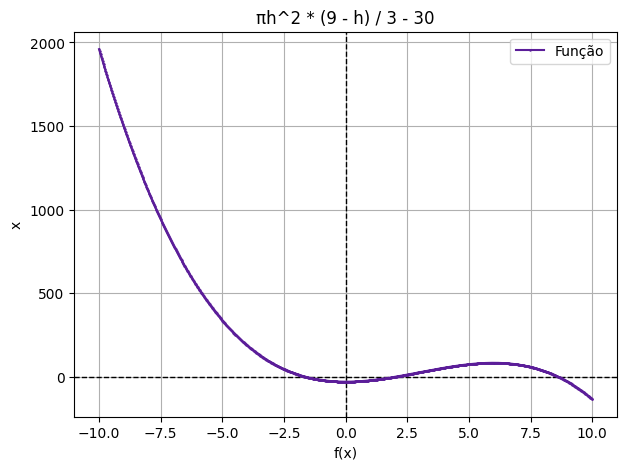

In [ ]:
# Função lambda do problema
H = lambda h:  (math.pi * (h**2) * (9 - h) / 3) - 30

exibirGrafico(H, -10, 10, None, 'πh^2 * (9 - h) / 3 - 30')

Através do gráfico foi possível perceber que existe mais de uma raiz para o problema. Diante desse cenário, optei por selecionar o intervalo de 0 a 5 para prosseguir com a resolução, considerando que esse intervalo engloba uma das três raízes identificadas.
Além disso, a minha implementação do método da falsa posição precisa passar uma precisão, para isso escolhi a precisão de $10^{-9}$



Algoritmo do Método da Falsa Posição
a = 0.0 
b = 5.0 
Precisão = 1e-09 
Número Máximo de Interações = 3 

  n        a    b        x          f(x)       f(a)     f(a)*f(x)
---  -------  ---  -------  ------------  ---------  ------------
  1  0          5  1.43239  -13.7403      -30        412.209
  2  1.43239    5  1.98654   -1.01611     -13.7403    13.9617
  3  1.98654    5  2.02697    0.00170127   -1.01611   -0.00172868

Resultado: 2.0269729728704076



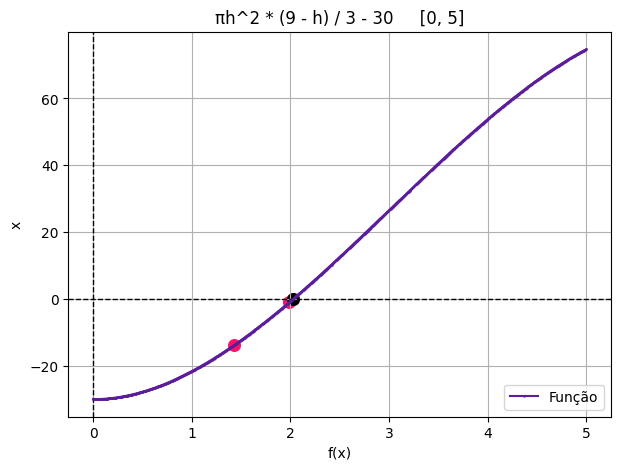

In [ ]:
# Dados provenientes da questão e que foram escolhidos
a = 0.0
b = 5.0
precisao = 0.000000001
n = 3

pontos_x = falsaPosição(H, a, b, precisao, 3)
exibirGrafico(H, a, b, pontos_x, 'πh^2 * (9 - h) / 3 - 30     [0, 5]')

Conforme solicitado no enunciado, o algoritmo realizou três iterações, resultando na identificação da raiz estimada como 2.02697. Esse valor representa a profundidade necessária para o tanque conter os $30m^3$ desejados. O próximo passo foi calcular o erro relativo aproximado após cada iteração.

Para isso, foi elaborado dois métodos que calculam essas taxas de erros:

In [ ]:
def erroAbsoluto(xExato, xAproximado):
  return abs(xExato - xAproximado)

def erroRelativo(xExato, xAproximado):
  return erroAbsoluto(xExato, xAproximado)/abs(xExato)

No entanto, vale ressaltar que a aplicação da fórmula requer o conhecimento do valor exato, o qual não é possível devido à natureza infinita da sequência numérica que compõe o número pi. Assim para ter um valor exato, utilizou-se o valor atual da iteração encontrado pelo método da falsa posição como valor exato e o valor anterior como valor aproximado. Ficando da seguinte forma a fórmula no final:

> ER =  |valor atual  - valor da iteração anterior| / |valor atual| * 100%

Vale ressaltar, que na primeira iteração, não há um valor anterior disponível. Para lidar com essa situação, escolhi um dos parâmetros de intervalo fornecidos como entrada para o método, sendo o valor A o selecionado. Abaixo, apresento uma tabela indicando o erro relativo aproximado após cada iteração, com base nesse critério de valor exato e aproximado.

In [ ]:
dados = []

for i in range(0, len(pontos_x)):
  valorExato = pontos_x[i]
  if i == 0:
    valorAnterior = a
  else:
    valorAnterior = pontos_x[i - 1]
  erro = erroRelativo(valorExato, valorAnterior) * 100
  dados.append([i+1, erro])

print(tabulate(dados, headers=['Iteração', 'Erro Aproximado Relativo (%)']))

  Iteração    Erro Aproximado Relativo (%)
----------  ------------------------------
         1                       100
         2                        27.8951
         3                         1.99461


Na análise das iterações, observou-se que na primeira iteração o erro relativo apresentou um valor elevado (100%), indicando divergência em relação à solução real. Este comportamento ocorre porque o valor está muito distante da solução. Já na segunda iteração, notou-se uma redução significativa no erro relativo, sugerindo uma aproximação a solução, porém, ainda com uma taxa de erro bem alta (27%). Na terceira e última iteração, o erro relativo atingiu um valor bem menor, mas ainda sim persistiu um erro associado de quase 2%.

É relevante destacar que a não obtenção de uma solução totalmente exata é devido a característica do método da falsa posição, no qual não assegura convergência rápida em todos os casos. Nesse contexto, seria necessário realizar mais iterações para atingir uma taxa de erro menor, garantindo uma solução mais precisa e próxima do valor exato desejado.

## QUESTÃO 4

**A recolha de energia solar através da focagem de um campo plano de espelhos numa central de recolha foi estudada por Vant-Hull (1976). A equação para a concentração geométrica do fator C é dada por:**
\begin{equation}
C = \frac{\pi \cdot \left(\frac{h}{\cos(A)}\right)^2 \cdot F}{0.5 \cdot \pi \cdot D^2 \cdot \left(1 + \sin(A) - 0.5 \cdot \cos(A)\right)}
\end{equation}

**em que A é o ângulo do campo, F é a cobertura da fração do campo com espelhos, D é o diâmetro do coletor e h é o comprimento do coletor. Considerando h = 300, F = 0,8 e D = 14, calcule o ângulo positivo A inferior a $Π/25$ para o qual a concentração do fator C é 1200. Utilize o método iterativo mais adequado e considere no critério de paragem $ε1 = ε2 = 10^{−3}$ ou no máximo 3 iterações.**


###Resposta

Novamente, como nos exercícios anteriores, o primeiro passo foi substituir os valores fornecidos no enunciado e deixar a função igual a zero, para assim poder encontrar o valor de A através de um método.
Os valores fornecidos pelo exercício são:
h = 300, F = 0.8, D = 14 e C = 1200

```
C = (π * ((h/cos(A))^2) * F) / (0.5 * π * (D^2) * (1 + sen(A) -0.5 * cos(A)))
1200 = (π * ((300/cos(A))^2) * 0.8) / (0.5 * π * (14^2) * (1 + sen(A) -0.5 * cos(A)))
0 = ((π * ((300/cos(A))^2) * 0.8) / (0.5 * π * 196 * (1 + sen(A) -0.5 * cos(A)))) - 1200
```

Após feito isso, considerou-se a seguinte afirmação: ângulo positivo A inferior a Π/25, ou seja, A não deve ser negativo e não deve ser maior que Π/25. Assim, considerou-se o intervalo de [0, Π/25]

Além disso, para a escolha do método iterativo foi analisado o comportamento da curva nesse intervalo

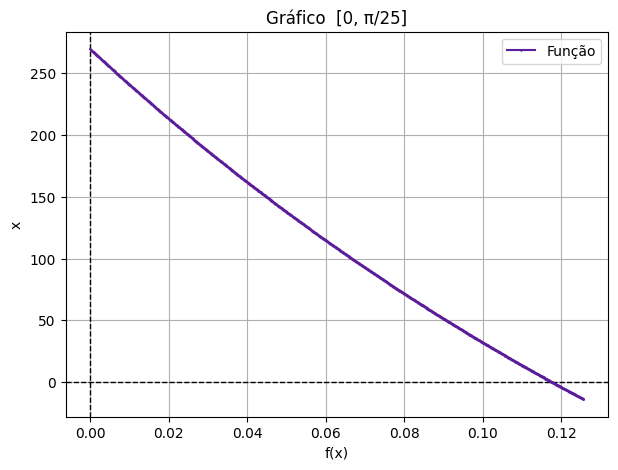

In [ ]:
C = lambda A: ((math.pi * ((300/cos(A))**2) * 0.8) / (0.5 * math.pi * 196 * (1 + sin(A) -0.5 * cos(A)))) - 1200

exibirGrafico(C, 0.0, math.pi/25, None, 'Gráfico  [0, π/25]')

Como podemos observar no gráfico, o valor fornecido pelo enunciado (π/25, aproximadamente 0.125...) está muito próximo da raiz da função. Nesse contexto, acredito que o método de Newton-Raphson seja uma escolha apropriada para determinar esse valor. Esse método geralmente converge rapidamente, especialmente quando dispomos de uma estimativa inicial próxima da solução, que é o caso desse exercício.

O método da Secante também seria uma opção interessante, já que é bastante similar ao método de Newton-Raphson, no entanto ele pode ter uma taxa de convergência um pouco mais lenta, uma vez que não exige o cálculo explícito da derivada.

Vale ressaltar que essa derivada pode parecer complexa à primeira vista, no entanto, ela se resume, essencialmente, à aplicação das regras de derivação, o que simplifica sua resolução. (Caso a derivada seja difícil de calcular ou se comportasse de maneira não suave em alguns pontos, outros métodos seriam mais recomendados, mas esse não é o caso dessa função para esse intervalo)

Assim apesar dos métodos como a bisseção, falsa posição e secante serem opções válidas, podem ser menos eficientes em termos de convergência, especialmente quando já se tem uma boa estimativa inicial para a raiz. A escolha entre métodos depende da natureza específica da função e das condições do problema, e, neste caso, a eficiência computacional do Newton-Raphson foi considerada a mais apropriada

x0 = 0.12566370614359174 
Precisão = 0.001 
Número Máximo de Interações = 3 

  k         x       f(x)     f'(x)    x - (f(x)/f'(x))
---  --------  ---------  --------  ------------------
  1  0.125664  -13.8447   -1688.52            0.117464
  2  0.117464    0.25314  -1750.61            0.117609

Resultado: 0.117609013145957



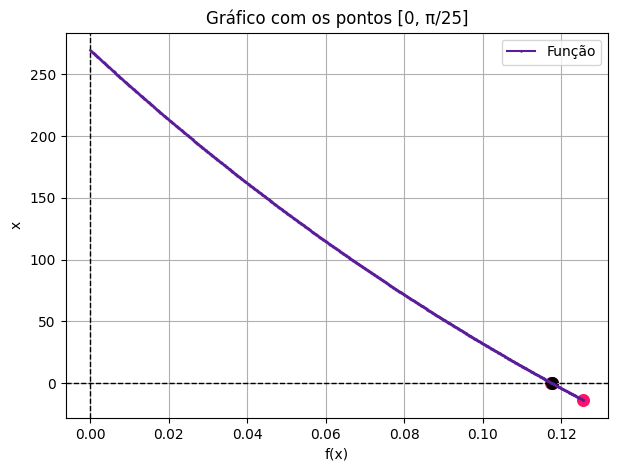

In [ ]:
# Dados provenientes da questão
x0 = math.pi/25
precisao = 0.001
n = 3

pontos_x = newtonRaphson(C,x0, precisao, n)
exibirGrafico(C, 0.0, x0, pontos_x, 'Gráfico com os pontos [0, π/25]')

O valor encontrado para o valor A foi 0.1176, estando dentro do intervalo requisitado (valor positivo e menor que Π/25).

## QUESTÃO 5

**Compare os Métodos da Bissecção, Métodos da Falsa Posição, Métodos de Newton-Raphson e Métodos da Secante quando aplicados nas funções abaixo. Para isso, utilize em todos os método o mesmo critério de parada, o número máximo de iterações 500 e tolerância de $10^{-10}$. Para o Método de Newton, considere $x_0$ como o ponto médio do intervalo dado.**

\begin{equation}
A)
f(x) = 2x^4 + 4x^3 + 3x^2 - 10x - 15, \quad x \in [0, 3]
\end{equation}

\begin{equation}
B) f(x) = \sin(x) \cdot x + 4, \quad x \in [1, 5]
\end{equation}

\begin{equation}
C) f(x) = (x - 3)^5 \ln(x), \quad x \in [2, 5]
\end{equation}


### Resposta

Para solucionar o exercício, executei a aplicação de todos os métodos para todas as funções propostas, armazenando os resultados em listas.

Aqui, vale ressaltar que optei por não gerar as tabelas de execução de cada iteração dos métodos devido à extensão do processo. No entanto, essa informação pode ser facilmente incluída removendo o item 'False' na chamada do método. Dessa forma, se houver interesse em visualizar as iterações específicas de cada método, basta ajustar essa configuração para obter uma visão mais detalhada do processo de convergência em cada passo

In [ ]:
# Dados provenientes da questão
n = 500
precisao = 0.0000000001

# Questão A
A = lambda x: 2 * x**4 + 4 * x**3 + 3 * x**2 - 10 * x - 15
a1 = 0.0
b1 = 3.0

# Questão B
B = lambda x: sin(x) * x + 4
a2 = 1.0
b2 = 5.0

# Questão C
C = lambda x: (x - 3)**5 * log(x)
a3 = 2.0
b3 = 5.0


# Calculando aproximações
pontosBissecção_A = bissecção(A, a1, b1, precisao, n, False)
pontosFalsaPosição_A = falsaPosição(A, a1, b1, precisao, n, False)
pontosNewtonRaphson_A = newtonRaphson(A, (a1+b1)/2, precisao, n, False)
pontosMetodoSecante_A = metodoSecante(A, a1, b1, precisao, n, False)
pontosBissecção_B = bissecção(B, a2, b2, precisao, n, False)
pontosFalsaPosição_B = falsaPosição(B, a2, b2, precisao, n, False)
pontosNewtonRaphson_B = newtonRaphson(B, (a2+b2)/2, precisao, n, False)
pontosMetodoSecante_B = metodoSecante(B, a2, b2, precisao, n, False)
pontosBissecção_C = bissecção(C, a3, b3, precisao, n, False)
pontosFalsaPosição_C = falsaPosição(C, a3, b3, precisao, n, False)
pontosNewtonRaphson_C = newtonRaphson(C, (a3+b3)/2, precisao, n, False)
pontosMetodoSecante_C = metodoSecante(C, a3, b3, precisao, n, False)

O próximo passo consistiu em organizar os dados encontrados anteriormente para possibilitar a comparação entre os diferentes métodos. A organização incluiu a criação de tabelas e gráficos, proporcionando uma visualização mais clara e concisa dos resultados.

Para isso, foi criado um método chamado 'gerarTabela', que exibe para cada questão os dados iniciais, o valor final encontrado por cada método e o número de interações que foram realizadas. Já em relação aos gráficos, os pontos gerados são referentes ao valor final encontrado em cada um dos métodos.

Essa abordagem possibilitou a comparação detalhada dos resultados obtidos por cada método em relação às diferentes funções, facilitando a análise comparativa e a identificação de padrões ou tendências em cada questão.



Questão A

                      Bissecção           Falsa Posição      Newton Raphson      Secante
--------------------  ------------------  -----------------  ------------------  -------------------
Dados Iniciais        [-2, 3.0]           [-2, 3.0]          x0 = 0.5            x0 = -2; x1 = 3.0
Valor x               1.4928787086100783  1.492878708663604  1.4928787086636037  -1.3003841326429082
Número de interações  35                  100                3                   10


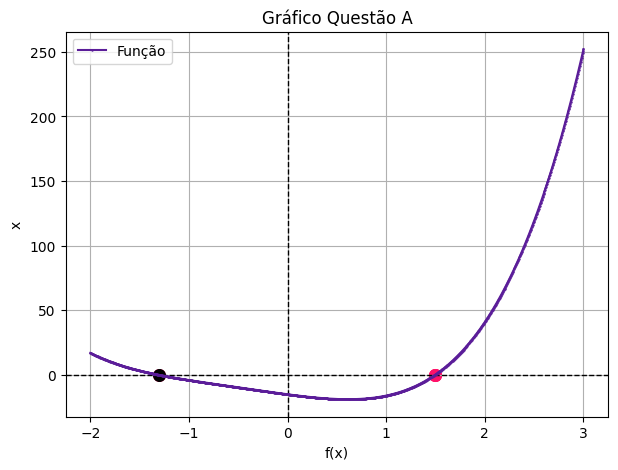




Questão B

                      Bissecção          Falsa Posição     Newton Raphson    Secante
--------------------  -----------------  ----------------  ----------------  ------------------
Dados Iniciais        [1.0, 5.0]         [1.0, 5.0]        x0 = 3.0          x0 = 1.0; x1 = 5.0
Valor x               4.323239543766249  4.32323954371371  4.32323954370369  4.32323954371374
Número de interações  36                 14                5                 7


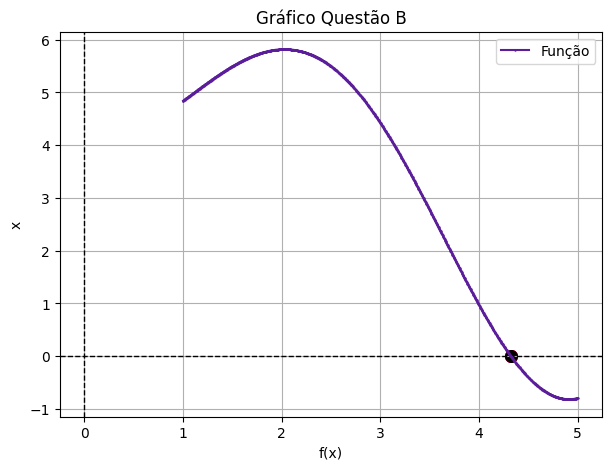




Questão C

                      Bissecção          Falsa Posição     Newton Raphson    Secante
--------------------  -----------------  ----------------  ----------------  ------------------
Dados Iniciais        [2.0, 5.0]         [2.0, 5.0]        x0 = 3.5          x0 = 2.0; x1 = 5.0
Valor x               3.000000000029104  2.67554444210864  3.00929642126840  2.99100788463438
Número de interações  35                 500               18                31


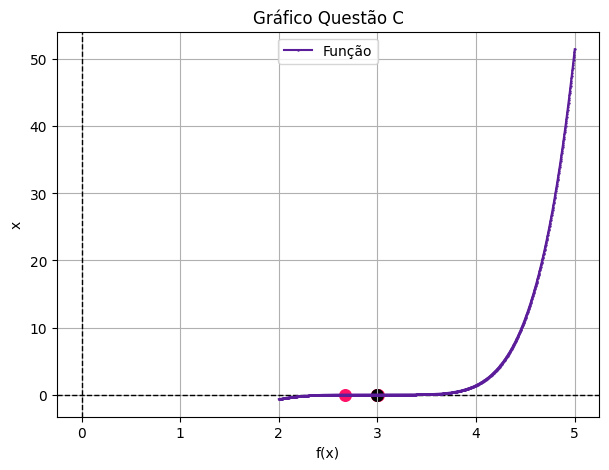

In [ ]:
def geraTabela(f, a, b, pontosBissecção, pontosFalsaPosição, pontosNewtonRaphson, pontosMetodoSecante, tituloGrafico):
  dados = [['Dados Iniciais', f'[{a}, {b}]' , f'[{a}, {b}]', f'x0 = {(a+b)/2}', f'x0 = {a}; x1 = {b}'],
          ['Valor x', pontosBissecção[-1], pontosFalsaPosição[-1], pontosNewtonRaphson[-1], pontosMetodoSecante[-1]],
          ['Número de interações', len(pontosBissecção), len(pontosFalsaPosição), len(pontosNewtonRaphson) - 1, len(pontosMetodoSecante)]]

  # Criar e imprimir a tabela
  tabela = tabulate(dados, headers=[' ', 'Bissecção', 'Falsa Posição', 'Newton Raphson', 'Secante'])
  print(tabela)

  pontos = [pontosBissecção[-1], pontosFalsaPosição[-1], pontosNewtonRaphson[-1], pontosMetodoSecante[-1]]
  exibirGrafico(f, a, b, pontos, tituloGrafico)

print("Questão A\n")
geraTabela(A, -2, b1, pontosBissecção_A, pontosFalsaPosição_A, pontosNewtonRaphson_A, pontosMetodoSecante_A, 'Gráfico Questão A')

print("\n\n\nQuestão B\n")
geraTabela(B, a2, b2, pontosBissecção_B, pontosFalsaPosição_B, pontosNewtonRaphson_B, pontosMetodoSecante_B, 'Gráfico Questão B')

print("\n\n\nQuestão C\n")
geraTabela(C, a3, b3, pontosBissecção_C, pontosFalsaPosição_C, pontosNewtonRaphson_C, pontosMetodoSecante_C, 'Gráfico Questão C')



Analisando os dados para essas funções específicas, percebemos que o método de Newton-Raphson foi o que apresentou a maior rapidez de convergência, ou seja, foi o método com o menor número de iterações. Isso se deve à característica desse método de utilizar o cálculo da derivada como aproximação. No entanto, é importante destacar que esse método é bastante suscetível ao ponto inicial escolhido.

Em segundo lugar, temos o método da secante, com uma rapidez de convergência um pouco mais lenta que o método de Newton-Raphson (uma vez que não exige o cálculo explícito da derivada), mas ainda assim conseguiu chegar mais rápido que os métodos da Bissecção e Falsa Posição. Isso ocorre porque o intervalo inicial escolhido afeta diretamente esses métodos e pode levar a mais iterações para a convergência, o que justifica serem métodos que tiveram uma menor rapidez na convergência nesses casos.

Assim, percebe-se que os métodos de Newton-Raphson e Secante podem convergir mais rapidamente, uma vez que tiram proveito da informação local da derivada, o que pode acelerar a convergência.

Em termos de garantia de convergência, os métodos da Bissecção e Falsa Posição geralmente são mais robustos e garantem convergência para funções contínuas em intervalos iniciais adequados. Já os métodos de Newton-Raphson e Secante podem falhar se os pontos iniciais não fornecerem boas aproximações da derivada ou se a função for mal comportada.

Analisando os resultados encontrados, observa-se que todos os métodos convergiram para um resultado, exceto na questão C para o método da Falsa Posição. Acredita-se que este resultado seja devido à presença do termo log(x) na função, que pode introduzir desafios na escolha adequada do intervalo. Como a função logarítmica possui uma variação muito pequena na curva, o método da Falsa Posição pode convergir lentamente até o resultado. Assim, como podemos ver nos resultados, o método da Falsa Posição alcançou o limite máximo de 500 iterações e não conseguiu encontrar o resultado a tempo.

Em relação ao esforço computacional, destaca-se o método da Bissecção e Falsa Posição, que tendem a ser mais simples e previsíveis, com menor complexidade. Uma vez que envolvem operações simples, como adição, subtração, multiplicação, divisão e decisões lógicas para ajustar o intervalo e determinar o próximo ponto. Já os métodos de Newton-Raphson e Secante envolvem cálculos de derivadas e um maior número de avaliações de função, aumentando a complexidade dos mesmos.

Em resumo, os métodos como Bissecção e Falsa Posição são mais robustos em termos de convergência garantida, mas podem ser mais lentos. Métodos como Newton-Raphson e Secante podem ser mais rápidos, mas possuem maior esforço computacional. Logo, a escolha do método de aproximação mais apropriado depende das propriedades específicas da função que está sendo tratada, das condições iniciais do problema e dos requisitos de desempenho.

#Rascunhos de Aula

In [ ]:
# Funções

#Semana II
f1 = lambda x: x**10 - 1
f2 = lambda x: x**3 - 9*x + 5
f3 = lambda x: math.e**x - x - 2
f4 = lambda x: x * math.log(x) - 1
f5 = lambda x: 2*(x**3) + 5*(x**2) - 8*x - 10

#Semana III
f6 = lambda x: x**3 - 9*x + 3
f7 = lambda x: 2*(x**3) + np.log(x) - 5
f8 = lambda x: x**3 - 5*(x**2) + x + 3
f9 = lambda x: x**2 + x - 6
f10 = lambda x: x**3 - 5*(x**2) + 17*x + 21




Algoritmo do Método da Bissecção
a = 0 
b = 1.3 
Precisão = 0.0001 
Número Máximo de Interações = 5 

  n      a        b        x       f(x)       f(a)    f(a)*f(x)
---  -----  -------  -------  ---------  ---------  -----------
  1  0      1.3      0.65     -0.986537  -1           0.986537
  2  0.65   1.3      0.975    -0.22367   -0.986537    0.220659
  3  0.975  1.3      1.1375    2.62672   -0.22367    -0.58752
  4  0.975  1.1375   1.05625   0.728491  -0.22367    -0.162942
  5  0.975  1.05625  1.01562   0.167707  -0.22367    -0.0375111

Resultado: 1.015625



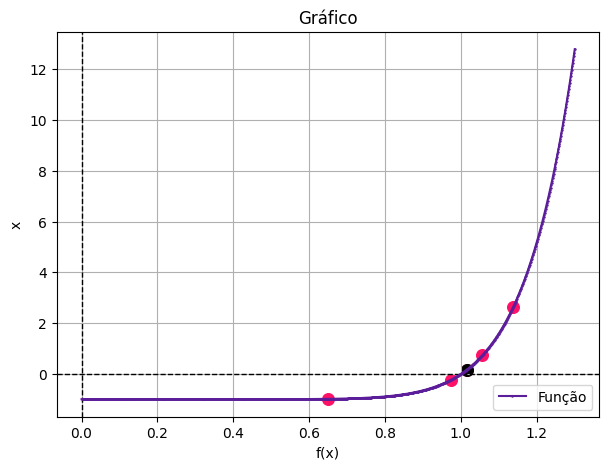

In [ ]:
f = f1
a = 0
b = 1.3
precisao = 0.0001
n = 5

pontos_x = bissecção(f, a, b, precisao, n)
if pontos_x:
  exibirGrafico(f, a, b, pontos_x)
else:
  print("Erro! Condição necessária: f(a)f(b) < 0")



Algoritmo do Método da Falsa Posição
a = 0.0 
b = 3.0 
Precisão = 0.05 
Número Máximo de Interações = 11 

  n         a    b         x         f(x)         f(a)    f(a)*f(x)
---  --------  ---  --------  -----------  -----------  -----------
  1  0           3  0.4       -12.272      -10          122.72
  2  0.4         3  0.812921  -12.1247     -12.272      148.795
  3  0.812921    3  1.15675    -9.46802    -12.1247     114.797
  4  1.15675     3  1.3911     -6.06892     -9.46802     57.4606
  5  1.3911      3  1.5285     -3.40441     -6.06892     20.6611
  6  1.5285      3  1.60173    -1.76751     -3.40441      6.01734
  7  1.60173     3  1.63875    -0.880829    -1.76751      1.55688
  8  1.63875     3  1.65695    -0.429996    -0.880829     0.378753
  9  1.65695     3  1.66577    -0.207799    -0.429996     0.0893527
 10  1.66577     3  1.67003    -0.0999291   -0.207799     0.0207652
 11  1.67003     3  1.67207    -0.047942    -0.0999291    0.0047908

Resultado: 1.6720668807613421


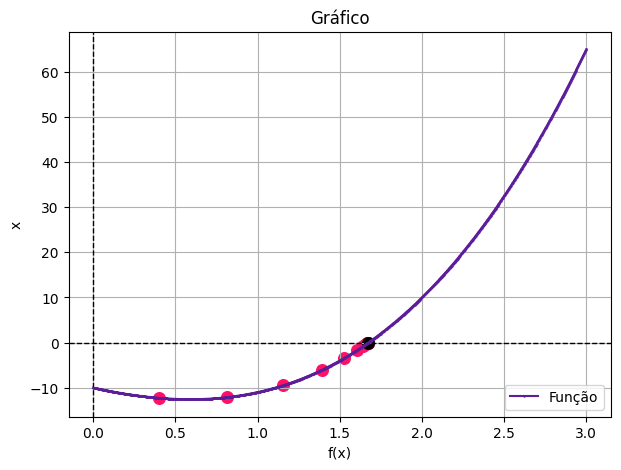

In [ ]:
f = f5
a = 0.0
b = 3.0
precisao = 0.05
n = 11

pontos_x = falsaPosição(f, a, b, precisao, n)

if pontos_x:
  exibirGrafico(f, a, b, pontos_x)
else:
  print("Erro! f(a)f(b) < 0")

x0 = -2.44 
Precisão = 1e-05 
Número Máximo de Interações = 10 

  k          x          f(x)     f'(x)    x - (f(x)/f'(x))
---  ---------  ------------  --------  ------------------
  1  -2.44      -43.7348      43.2608            -1.42904
  2  -1.42904   -11.5582      21.4169            -0.889367
  3  -0.889367   -2.5477      12.2666            -0.681673
  4  -0.681673   -0.321819     9.21076           -0.646733
  5  -0.646733   -0.00855768   8.72212           -0.645752

Resultado: -0.645752078133534



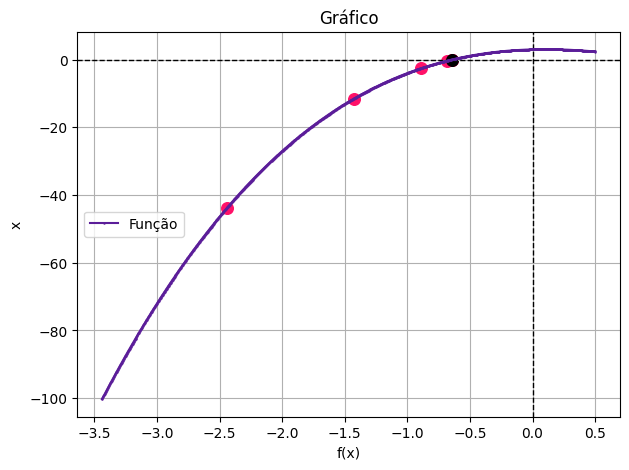

In [ ]:
f = f8
x0 = -2.44
precisao = 0.00001
n = 10

pontos_x = newtonRaphson(f, x0, precisao, n)
if pontos_x:
  exibirGrafico(f, x0 - 1, 0.5, pontos_x)
else:
  print("Erro!")



Algoritmo do Método da Secante
x0 = -1.0 
x1 = 1.0 
Precisão = 1e-15 
Número Máximo de Interações = 8 

  k         x0         x1    x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)
---  ---------  ---------  --------------------------------------------
  1  -1          1                                            -0.888889
  2   1         -0.888889                                     -0.960142
  3  -0.888889  -0.960142                                     -0.931788
  4  -0.960142  -0.931788                                     -0.932112
  5  -0.931788  -0.932112                                     -0.932115
  6  -0.932112  -0.932115                                     -0.932115
  7  -0.932115  -0.932115                                     -0.932115

Resultado: -0.9321148566637244



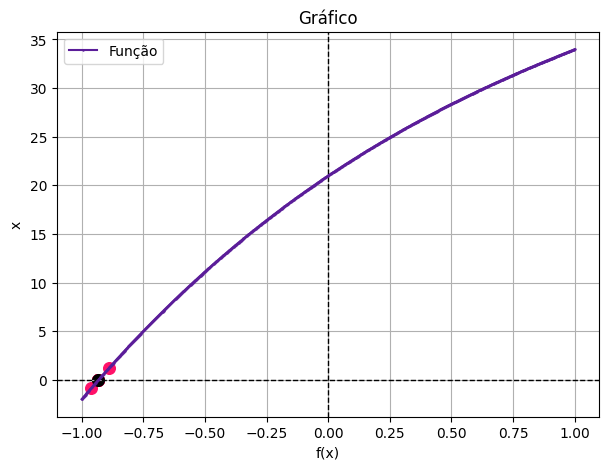

In [ ]:
f = f10
x0 = -1.0
x1 = 1.0
precisao = 0.000000000000001
n = 8

pontos_x = metodoSecante(f, x0, x1, precisao, n)
if pontos_x:
  exibirGrafico(f, x0, x1, pontos_x)
else:
  print("Erro!")